In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

## Without Pre-processing

### Load the dataset

In [3]:
benign=pd.read_csv('/content/drive/MyDrive/archive/5.benign.csv')
g_c=pd.read_csv('/content/drive/MyDrive/archive/5.gafgyt.combo.csv')
g_j=pd.read_csv('/content/drive/MyDrive/archive/5.gafgyt.junk.csv')
g_s=pd.read_csv('/content/drive/MyDrive/archive/5.gafgyt.scan.csv')
g_t=pd.read_csv('/content/drive/MyDrive/archive/5.gafgyt.tcp.csv')
g_u=pd.read_csv('/content/drive/MyDrive/archive/5.gafgyt.udp.csv')
m_a=pd.read_csv('/content/drive/MyDrive/archive/5.mirai.ack.csv')
m_sc=pd.read_csv('/content/drive/MyDrive/archive/5.mirai.scan.csv')
m_sy=pd.read_csv('/content/drive/MyDrive/archive/5.mirai.syn.csv')
m_u=pd.read_csv('/content/drive/MyDrive/archive/5.mirai.udp.csv')
m_u_p=pd.read_csv('/content/drive/MyDrive/archive/5.mirai.udpplain.csv')

benign=benign.sample(frac=0.25,replace=False)
g_c=g_c.sample(frac=0.25,replace=False)
g_j=g_j.sample(frac=0.5,replace=False)
g_s=g_s.sample(frac=0.5,replace=False)
g_t=g_t.sample(frac=0.15,replace=False)
g_u=g_u.sample(frac=0.15,replace=False)
m_a=m_a.sample(frac=0.25,replace=False)
m_sc=m_sc.sample(frac=0.15,replace=False)
m_sy=m_sy.sample(frac=0.25,replace=False)
m_u=m_u.sample(frac=0.1,replace=False)
m_u_p=m_u_p.sample(frac=0.27,replace=False)

benign['type']='benign'
m_u['type']='mirai_udp'
g_c['type']='gafgyt_combo'
g_j['type']='gafgyt_junk'
g_s['type']='gafgyt_scan'
g_t['type']='gafgyt_tcp'
g_u['type']='gafgyt_udp'
m_a['type']='mirai_ack'
m_sc['type']='mirai_scan'
m_sy['type']='mirai_syn'
m_u_p['type']='mirai_udpplain'

data=pd.concat([benign,m_u,g_c,g_j,g_s,g_t,g_u,m_a,m_sc,m_sy,m_u_p],
               axis=0, sort=False, ignore_index=True)

In [4]:
data.groupby('type')['type'].count()

type
benign            15538
gafgyt_combo      15345
gafgyt_junk       15449
gafgyt_scan       14648
gafgyt_tcp        15676
gafgyt_udp        15602
mirai_ack         15138
mirai_scan        14517
mirai_syn         16436
mirai_udp         15625
mirai_udpplain    15304
Name: type, dtype: int64

In [5]:
sampler=np.random.permutation(len(data))
data=data.take(sampler)
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
48196,180.343041,74.019954,0.478503,292.068087,74.029383,0.704330,851.593100,74.038768,1.435279,5175.760296,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,gafgyt_junk
50460,147.425430,74.036204,23.894544,201.918516,74.319672,249.454511,428.350716,76.597573,2114.790625,6441.212743,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,gafgyt_junk
97671,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,gafgyt_udp
104267,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,gafgyt_udp
29226,147.528656,237.633743,56190.892076,213.468041,271.409413,59726.931103,538.913736,322.444446,60747.406969,4127.648557,...,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0,mirai_udp


In [6]:
X = data.drop(['type'], axis=1)
y = data.loc[:, 'type']
X.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
48196,180.343041,74.019954,0.478503,292.068087,74.029383,0.704330,851.593100,74.038768,1.435279,5175.760296,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
50460,147.425430,74.036204,23.894544,201.918516,74.319672,249.454511,428.350716,76.597573,2114.790625,6441.212743,...,0.0,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0
97671,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
104267,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0
29226,147.528656,237.633743,56190.892076,213.468041,271.409413,59726.931103,538.913736,322.444446,60747.406969,4127.648557,...,0.0,0.0,0.0,1.0,554.0,0.0,554.0,0.0,0.0,0.0


### Model Creation

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Different Model with Evalaution Metrics and Visualization

In [8]:
model=LogisticRegression(random_state=0)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [9]:
# Calculate accuracy and confusion matrix
conf_matrix = confusion_matrix(model.predict(x_train), y_train)
accuracy = accuracy_score(model.predict(x_train), y_train)
precision = precision_score(model.predict(x_train), y_train, average='weighted')
recall = recall_score(model.predict(x_train), y_train, average='weighted')
f1 = f1_score(model.predict(x_train), y_train,average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[13953 13757 13923 13254 14102 14033 13625 13051 14818 14061 13773]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0]]

Accuracy: 0.09158516573679029
Precision: 1.0
Recall: 0.09158516573679029
F1 Score: 0.16780214427881637


In [12]:
# Train the model
model1 = GaussianNB().fit(x_train, y_train)
# Make predictions
y_pred = model1.predict(x_test)

In [13]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f11 = f1_score(y_test, y_pred, average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[   6    0    0   12    0    0   13 1553    1    0    0]
 [   0    0    0    2    0    0  131 1396   59    0    0]
 [   2    2    8    0    3    0  222 1112  146   31    0]
 [   0    0    0  880    0    0    8  504    2    0    0]
 [   3    0    0    1    0    0    1 1569    0    0    0]
 [   0    0    0    1    0    0    0 1568    0    0    0]
 [   3    0    0    1    0    0   50 1458    1    0    0]
 [   1    0    0    0    0    0    0 1465    0    0    0]
 [   0    0    0    2    0    0   65 1539   12    0    0]
 [   0    0    0    0    0    0   30 1524   10    0    0]
 [   0    0    0    2    0    0   68 1444   17    0    0]]

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

        benign       0.40      0.00      0.01      1585
  gafgyt_combo       0.00      0.00      0.00      1588
   gafgyt_junk       1.00      0.01      0.01      1526
   gafgyt_scan       0.98      0.63      0.77      1394
    gafgyt_tcp       0.00      0.00      0.00      1574
    gafgyt_udp       0.00      0.00      0.00      1569
     mirai_ack       0.09      0.03      0.05      1513
    mirai_scan       0.10      1.00      0.18      1466
     mirai_syn       0.05      0.01      0.01      1618
     mirai_udp       0.00      0.00      0.00      1564
mirai_udpplain       0.00      0.00      0.00      1531

      accuracy                           0.14     16928
     macro avg       0.24      0.15      0.09     16928
  weighted avg       0.23      0.14      0.09     16928


Accuracy: 0.14301748582230625
Precision: 0.22863814776783786
Recall: 0.14301748582230625
F1 Score: 0.08556555542035031


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Initialize the classifier with random_state=0
mlp1 = MLPClassifier(random_state=0)
# Fit the classifier to the training data
mlp1.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [15]:
accuracy2 = accuracy_score(mlp1.predict(x_train), y_train)
print("Accuracy:",accuracy2)
y_pred = mlp1.predict(x_test)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.17870692484410897
Precision: 0.10360480153301095
Recall: 0.1795250472589792
F1-score: 0.10658490250926862


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


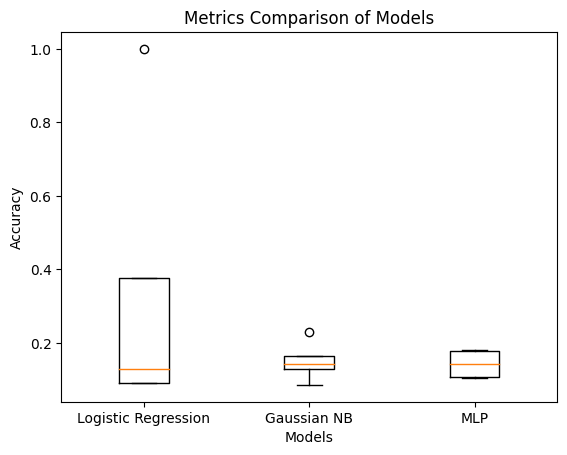

In [16]:
# Visualize accuracy scores
models = ['Logistic Regression', 'Gaussian NB', 'MLP']
accuracies = [
    [accuracy, precision, recall, f1],  # Logistic Regression accuracies
    [accuracy1, precision1, recall1, f11],  # Gaussian NB accuracies
    [accuracy2, precision2, recall2, f12]   # MLP accuracies
]
import matplotlib.pyplot as plt
plt.boxplot(accuracies, labels=models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Metrics Comparison of Models')
# Display the plot
plt.show()

### Feature Contribution

In [17]:
print("Features contributing to the model - Logistic Regression:")
for i, class_label in enumerate(model.classes_):
    print(f"\nClass: {class_label}")
    print("Means:")
    class_means = x_train[y_train == class_label].mean().sort_values(ascending=False)
    print(class_means)  # Mean for each feature in this class
    print("Variances:")
    class_variances = x_train[y_train == class_label].var().sort_values(ascending=False)
    print(class_variances)  # Variance for each feature in this class

Features contributing to the model - Logistic Regression:

Class: benign
Means:
HH_jit_L0.01_variance    3.881655e+15
HH_jit_L0.1_variance     2.115896e+15
HH_jit_L1_variance       1.153771e+15
HH_jit_L3_variance       5.597239e+14
HH_jit_L5_variance       3.738324e+14
                             ...     
HH_L0.01_covariance     -8.324047e+01
HH_L5_covariance        -2.065375e+03
HH_L3_covariance        -2.690920e+03
HH_L1_covariance        -3.650527e+03
HH_L0.1_covariance      -3.868874e+03
Length: 115, dtype: float64
Variances:
HH_jit_L0.01_variance    1.225314e+33
HH_jit_L0.1_variance     7.876137e+32
HH_jit_L1_variance       4.101019e+32
HH_jit_L3_variance       1.808979e+32
HH_jit_L5_variance       1.294868e+32
                             ...     
HH_L1_pcc                2.755885e-02
HpHp_L3_pcc              2.693372e-02
HpHp_L5_pcc              2.594995e-02
HH_L3_pcc                2.177636e-02
HH_L5_pcc                1.915213e-02
Length: 115, dtype: float64

Class: gafgyt_co

### Ablation Analysis

In [18]:
# Perform ablation analysis
removed_features = []
scores = []

for feature in X.columns:
    # Remove the current feature
    reduced_features = X.drop(feature, axis=1)

    x_train, x_test, y_train, y_test = train_test_split(reduced_features, y, test_size=0.1)

    # Train a new model without the feature
    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)

    # Evaluate the model without the feature
    score = accuracy_score(y_test, model.predict(x_test))
    scores.append(score)

    # Store the removed feature
    removed_features.append(feature)

# Create a dataframe with results
results_df = pd.DataFrame({"Feature Removed": removed_features, "Accuracy Score": scores})

# Print the results
print("Ablation Analysis Results:")
print(results_df.to_string())

# Compare the original and reduced model performance
print("Reduced Model Accuracy Range:", min(scores), "-", max(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr

Ablation Analysis Results:
           Feature Removed  Accuracy Score
0         MI_dir_L5_weight        0.095286
1           MI_dir_L5_mean        0.089615
2       MI_dir_L5_variance        0.090442
3         MI_dir_L3_weight        0.088315
4           MI_dir_L3_mean        0.093336
5       MI_dir_L3_variance        0.093986
6         MI_dir_L1_weight        0.091978
7           MI_dir_L1_mean        0.094991
8       MI_dir_L1_variance        0.092982
9       MI_dir_L0.1_weight        0.091682
10        MI_dir_L0.1_mean        0.087075
11    MI_dir_L0.1_variance        0.088906
12     MI_dir_L0.01_weight        0.091446
13       MI_dir_L0.01_mean        0.088138
14   MI_dir_L0.01_variance        0.088138
15             H_L5_weight        0.090796
16               H_L5_mean        0.094931
17           H_L5_variance        0.092628
18             H_L3_weight        0.092805
19               H_L3_mean        0.087843
20           H_L3_variance        0.089674
21             H_L1_weight 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


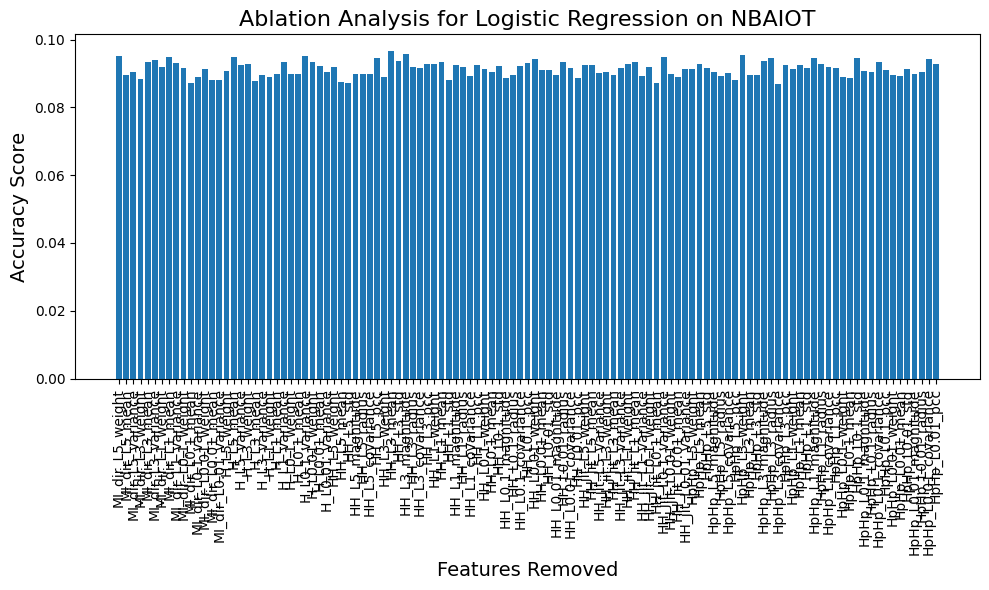

In [19]:
# Prepare data
features = results_df["Feature Removed"]
scores = results_df["Accuracy Score"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)

# Add labels and title
plt.xlabel("Features Removed", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.title("Ablation Analysis for Logistic Regression on NBAIOT", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## With preprocessing

### Load the dataset

In [20]:
benign=pd.read_csv('/content/drive/MyDrive/archive/5.benign.csv')
g_c=pd.read_csv('/content/drive/MyDrive/archive/5.gafgyt.combo.csv')
g_j=pd.read_csv('/content/drive/MyDrive/archive/5.gafgyt.junk.csv')
g_s=pd.read_csv('/content/drive/MyDrive/archive/5.gafgyt.scan.csv')
g_t=pd.read_csv('/content/drive/MyDrive/archive/5.gafgyt.tcp.csv')
g_u=pd.read_csv('/content/drive/MyDrive/archive/5.gafgyt.udp.csv')
m_a=pd.read_csv('/content/drive/MyDrive/archive/5.mirai.ack.csv')
m_sc=pd.read_csv('/content/drive/MyDrive/archive/5.mirai.scan.csv')
m_sy=pd.read_csv('/content/drive/MyDrive/archive/5.mirai.syn.csv')
m_u=pd.read_csv('/content/drive/MyDrive/archive/5.mirai.udp.csv')
m_u_p=pd.read_csv('/content/drive/MyDrive/archive/5.mirai.udpplain.csv')

benign=benign.sample(frac=0.25,replace=False)
g_c=g_c.sample(frac=0.25,replace=False)
g_j=g_j.sample(frac=0.5,replace=False)
g_s=g_s.sample(frac=0.5,replace=False)
g_t=g_t.sample(frac=0.15,replace=False)
g_u=g_u.sample(frac=0.15,replace=False)
m_a=m_a.sample(frac=0.25,replace=False)
m_sc=m_sc.sample(frac=0.15,replace=False)
m_sy=m_sy.sample(frac=0.25,replace=False)
m_u=m_u.sample(frac=0.1,replace=False)
m_u_p=m_u_p.sample(frac=0.27,replace=False)

benign['type']='benign'
m_u['type']='mirai_udp'
g_c['type']='gafgyt_combo'
g_j['type']='gafgyt_junk'
g_s['type']='gafgyt_scan'
g_t['type']='gafgyt_tcp'
g_u['type']='gafgyt_udp'
m_a['type']='mirai_ack'
m_sc['type']='mirai_scan'
m_sy['type']='mirai_syn'
m_u_p['type']='mirai_udpplain'

data=pd.concat([benign,m_u,g_c,g_j,g_s,g_t,g_u,m_a,m_sc,m_sy,m_u_p],
               axis=0, sort=False, ignore_index=True)

In [21]:
X = data.drop(['type'], axis=1)
y = data.loc[:, 'type']
X.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,26.416454,159.880975,4.444022e+04,29.157032,159.240645,4.398830e+04,32.946767,157.639953,4.269760e+04,39.881012,...,1.600000e+01,0.000000e+00,0.000000e+00,1.999957,69.999914,4.000000e+00,101.862593,1.600000e+01,0.000000,0.000000
1,9.408448,60.000000,1.490000e-09,10.668036,60.000001,2.930000e-05,12.382982,60.022579,5.635387e-01,15.583548,...,9.090000e-13,0.000000e+00,0.000000e+00,6.995549,60.000000,9.540000e-07,60.000000,9.090000e-13,0.000000,0.000000
2,2.017807,89.734634,7.890572e+00,2.089301,88.717402,3.683259e+01,2.461066,84.453848,1.343621e+02,4.163983,...,3.514584e+01,-2.490000e-10,-1.980000e-07,5.778831,85.751852,1.045933e+01,104.739268,1.093980e+02,-0.061111,-0.011414
3,1.032274,60.000000,7.970000e-08,1.142995,60.000039,1.157531e-03,1.993742,60.356055,1.055201e+01,8.122942,...,9.090000e-13,0.000000e+00,0.000000e+00,8.133568,60.000000,1.170000e-06,60.000000,1.360000e-12,0.000000,0.000000
4,2.999836,90.000000,0.000000e+00,2.999902,90.000000,3.640000e-12,2.999967,90.000000,5.300000e-10,3.262108,...,1.828960e-04,-9.630000e-12,-1.700000e-07,4.356631,88.357065,6.825600e+00,106.883381,4.658956e+01,-0.200247,-0.057076


### Model Creation

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Normalization

In [23]:
print("Data Shape:", data.shape)

def check_null(data):
    for i in data.isnull().sum():
        if data.isnull().sum()[i]!=0:
            return print("Data contains Null values.")
    return print("Data is Clean of Null values.")


def check_NA(data):
    for i in data.isna().sum():
        if data.isna().sum()[i]!=0:
            return print("Data contains Null.")
    return print("Data is Clean of NA.")

Data Shape: (169278, 116)


In [24]:
print(data.duplicated().sum(), "fully duplicate rows to remove")
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)
data.shape

987 fully duplicate rows to remove


(168291, 116)

In [25]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.transform(x_test)

### Different Model with Evalaution Metrics and Visualization

In [26]:
model=LogisticRegression(random_state=0)
model.fit(X_train_sc, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [27]:
# Calculate accuracy and confusion matrix
conf_matrix = confusion_matrix(model.predict(X_train_sc), y_train)
accuracy = accuracy_score(model.predict(X_train_sc), y_train)
precision = precision_score(model.predict(X_train_sc), y_train, average='weighted')
recall = recall_score(model.predict(X_train_sc), y_train, average='weighted')
f1 = f1_score(model.predict(X_train_sc), y_train,average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[13949     1     5    15     7     4     1     1     7     0     0]
 [    2  8205  2382     5     0     1     0     0     1     0     0]
 [    3  5543 11492     2     0     0     0     0    61     0     0]
 [   11     2     7 13147     2     8     1     0     4     6     3]
 [   10     0     2     5 14114 14034     7     0     2     1     3]
 [   14     0     2    23     2     3     0     0     0     1     1]
 [    7     0     0     0     3     0 12884     0     0   304    30]
 [    0     1     0     0     0     0     0 13016   231     0     0]
 [   14     6    22     0     0     0     0     0 14469     0     0]
 [    0     0     1     0     0     0   395     0     0 13783     0]
 [    1     0     0     5     0     1   354     0     0     0 13721]]

Accuracy: 0.8453101411224155
Precision: 0.9420311800895816
Recall: 0.8453101411224155
F1 Score: 0.8766232789336679


In [28]:
# Train the model
model1 = GaussianNB().fit(X_train_sc, y_train)
# Make predictions
y_pred = model1.predict(X_test_sc)

In [29]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f11 = f1_score(y_test, y_pred, average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

Confusion Matrix:
[[ 830    0    0  697    0    0    0    0    0    0    0]
 [   0 1573   11    2    1    0    0    0    0    0    0]
 [   0 1501   33    2    0    0    0    0    0    0    0]
 [   0    0    0 1446    0    0    0    0    0    0    0]
 [   1    0    0    0    0 1547    0    0    0    0    0]
 [   3    0    0    0    0 1548    0    0    0    0    0]
 [   0    0    0    0    0    0 1496    0    0    0    0]
 [   0    0    0    9    0    0    0 1491    0    0    0]
 [   0    0    1    3    0    0    0    0 1657    0    0]
 [   0    0    0    0    0    0   40    0    0 1490    0]
 [   0    0    0    0    0    1   12    0    0    0 1533]]

Classification Report:
                precision    recall  f1-score   support

        benign       1.00      0.54      0.70      1527
  gafgyt_combo       0.51      0.99      0.67      1587
   gafgyt_junk       0.73      0.02      0.04      1536
   gafgyt_scan       0.67      1.00      0.80      1446
    gafgyt_tcp       0.00      0.00   

In [30]:
# Initialize the classifier with random_state=0
mlp1 = MLPClassifier(random_state=0)
# Fit the classifier to the training data
mlp1.fit(X_train_sc, y_train)

MLPClassifier(random_state=0)

In [31]:
accuracy2 = accuracy_score(mlp1.predict(X_train_sc), y_train)
print("Accuracy:",accuracy2)
y_pred = mlp1.predict(X_test_sc)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.9052248112897933
Precision: 0.951479509956568
Recall: 0.905718336483932
F1-score: 0.875327386573792


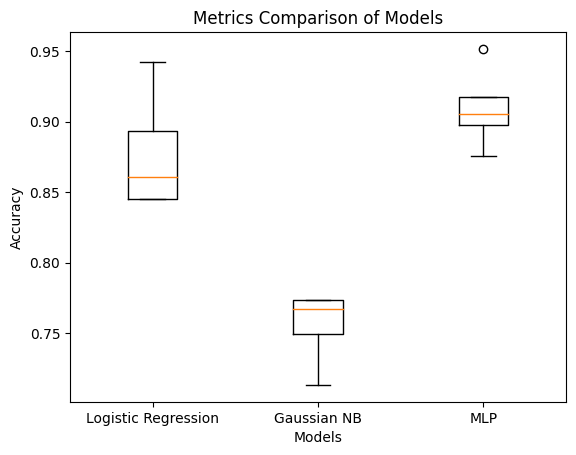

In [32]:
# Visualize accuracy scores
models = ['Logistic Regression', 'Gaussian NB', 'MLP']
accuracies = [
    [accuracy, precision, recall, f1],  # Logistic Regression accuracies
    [accuracy1, precision1, recall1, f11],  # Gaussian NB accuracies
    [accuracy2, precision2, recall2, f12]   # MLP accuracies
]
import matplotlib.pyplot as plt
plt.boxplot(accuracies, labels=models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Metrics Comparison of Models')
# Display the plot
plt.show()

### Feature Contribution

In [33]:
print("Features contributing to the model - Logistic Regression:")
for i, class_label in enumerate(model1.classes_):
    print(f"\nClass: {class_label}")
    print("Means:")
    class_means = x_train[y_train == class_label].mean().sort_values(ascending=False)
    print(class_means)  # Mean for each feature in this class
    print("Variances:")
    class_variances = x_train[y_train == class_label].var().sort_values(ascending=False)
    print(class_variances)  # Variance for each feature in this class

Features contributing to the model - Logistic Regression:

Class: benign
Means:
HH_jit_L0.01_variance    4.129636e+15
HH_jit_L0.1_variance     2.373814e+15
HH_jit_L1_variance       1.300767e+15
HH_jit_L3_variance       6.675345e+14
HH_jit_L5_variance       4.398124e+14
                             ...     
HH_L0.01_covariance     -4.810232e+01
HH_L5_covariance        -2.096473e+03
HH_L3_covariance        -2.713235e+03
HH_L1_covariance        -3.653680e+03
HH_L0.1_covariance      -3.854382e+03
Length: 115, dtype: float64
Variances:
HH_jit_L0.01_variance    1.332022e+33
HH_jit_L0.1_variance     8.914794e+32
HH_jit_L1_variance       4.658519e+32
HH_jit_L3_variance       2.143119e+32
HH_jit_L5_variance       1.466135e+32
                             ...     
HpHp_L1_pcc              2.901550e-02
HpHp_L3_pcc              2.653675e-02
HpHp_L5_pcc              2.553510e-02
HH_L3_pcc                2.346777e-02
HH_L5_pcc                2.076015e-02
Length: 115, dtype: float64

Class: gafgyt_co

### Ablation Analysis

In [34]:
# Perform ablation analysis
removed_features = []
scores = []

for feature in X.columns:
    # Remove the current feature
    reduced_features = X.drop(feature, axis=1)

    x_train, x_test, y_train, y_test = train_test_split(reduced_features, y, test_size=0.1)

    # Train a new model without the feature
    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)

    # Evaluate the model without the feature
    score = accuracy_score(y_test, model.predict(x_test))
    scores.append(score)

    # Store the removed feature
    removed_features.append(feature)

# Create a dataframe with results
results_df = pd.DataFrame({"Feature Removed": removed_features, "Accuracy Score": scores})

# Print the results
print("Ablation Analysis Results:")
print(results_df.to_string())

# Compare the original and reduced model performance
print("Reduced Model Accuracy Range:", min(scores), "-", max(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr

Ablation Analysis Results:
           Feature Removed  Accuracy Score
0         MI_dir_L5_weight        0.088729
1           MI_dir_L5_mean        0.090796
2       MI_dir_L5_variance        0.091387
3         MI_dir_L3_weight        0.091741
4           MI_dir_L3_mean        0.092982
5       MI_dir_L3_variance        0.093986
6         MI_dir_L1_weight        0.088788
7           MI_dir_L1_mean        0.095640
8       MI_dir_L1_variance        0.090147
9       MI_dir_L0.1_weight        0.091446
10        MI_dir_L0.1_mean        0.090914
11    MI_dir_L0.1_variance        0.093336
12     MI_dir_L0.01_weight        0.089083
13       MI_dir_L0.01_mean        0.089910
14   MI_dir_L0.01_variance        0.094636
15             H_L5_weight        0.093514
16               H_L5_mean        0.093336
17           H_L5_variance        0.090796
18             H_L3_weight        0.091446
19               H_L3_mean        0.094459
20           H_L3_variance        0.091210
21             H_L1_weight 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


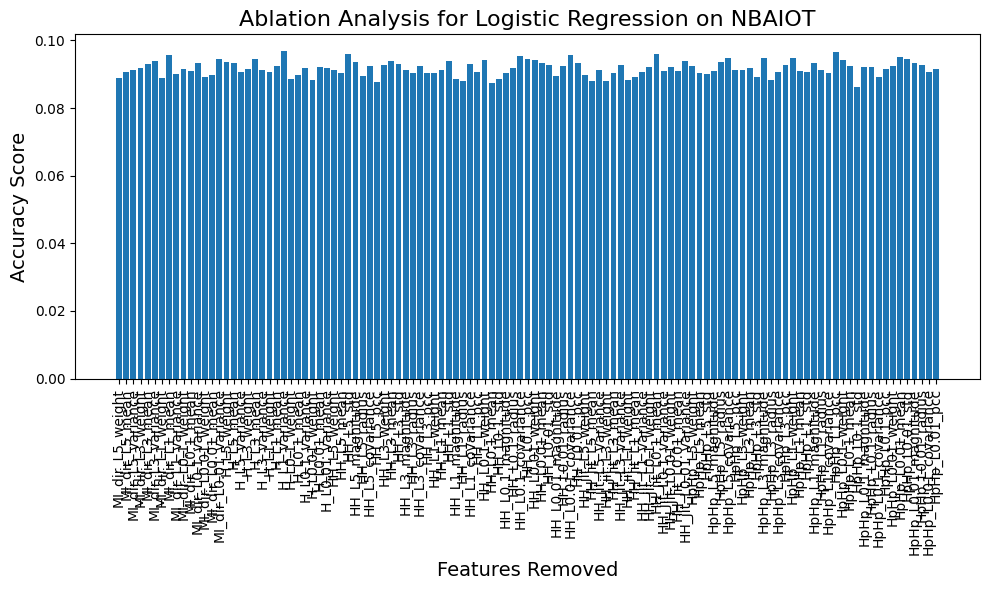

In [35]:
# Prepare data
features = results_df["Feature Removed"]
scores = results_df["Accuracy Score"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)

# Add labels and title
plt.xlabel("Features Removed", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.title("Ablation Analysis for Logistic Regression on NBAIOT", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()